##### Q1) Create a dataframe of shape (1000,4) that holds integer values between 1 and 5 and execute the describe function on it. [2]

##### Q2) Replace the above dataframe's column 0 values which are equal to 4 by a randomly generated integer.[2]

##### Q3) Study the presence of outliers by generating the boxplot and scatter plot for the above data.[4]

##### Q4) Based on z-score calculation, remove the ouliters from the data.[2]

##### Q5) Based on IQR-score calculation,remove the ouliters from the data.[2]

##### Q6) Use the dataset https://parvathy47.github.io/Parvathy47.github.io/Pak_Suicide_Bombings.csv again and perform the following operations:

**a) How many unique province values are present in the dataset (as part of first look at data)?[2]**

**b) Resolve the inconsistencies arising due to presence of whitespaces and difference in cases and then display the number of unique city values now.[2]**

**c) Display the names of those cities that are closest to 'D.I. Khan'.[2]**

**d) Using the function created in class handle all the province name related inconsistencies.[2]**

##### Q1) Create a dataframe of shape (1000,4) that holds integer values between 1 and 5 and execute the describe function on it. [2]

In [8]:
import pandas as pd
import numpy as np
import random

In [9]:
df = pd.DataFrame({'A':np.random.randint(1,5,1000),'B':np.random.randint(1,5,1000),
                   'C':np.random.randint(1,5,1000),'D':np.random.randint(1,5,1000)})
df

,A,B,C,D
0,2,3,2,3
1,4,4,3,1
2,3,1,4,4
3,1,1,3,4
4,4,1,4,1
...,...,...,...,...
995,3,4,2,2
996,1,4,2,4
997,1,2,1,4
998,2,1,2,1


In [10]:
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.512000,2.498000,2.435000,2.522000
std,1.105024,1.123948,1.114009,1.118377
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000
50%,3.000000,2.000000,2.000000,3.000000
75%,3.000000,4.000000,3.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000


In [11]:
df.head(10)

,A,B,C,D
0,2,3,2,3
1,4,4,3,1
2,3,1,4,4
3,1,1,3,4
4,4,1,4,1
5,3,4,1,1
6,4,1,2,2
7,2,2,4,4
8,2,4,3,2
9,1,4,1,3


##### Q2) Replace the above dataframe's column 0 values which are equal to 4 by a randomly generated integer.[2]

In [12]:
df.A.replace({4:np.random.randint(5,10)},inplace=True)

In [13]:
df.head()

,A,B,C,D
0,2,3,2,3
1,5,4,3,1
2,3,1,4,4
3,1,1,3,4
4,5,1,4,1


##### Q3) Study the presence of outliers by generating the boxplot and scatter plot for the above data.[4]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['A'])

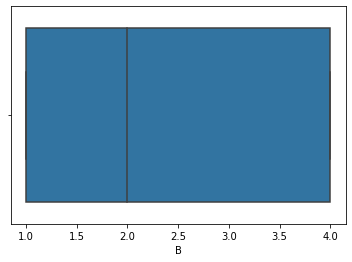

In [15]:
sns.boxplot(df['B'])

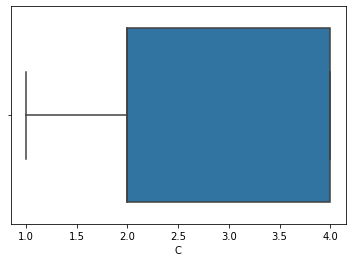

In [45]:
sns.boxplot(df['C'])

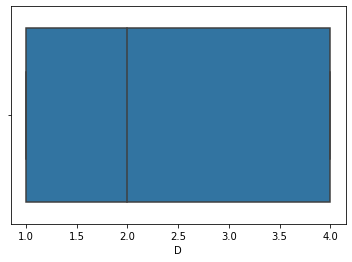

In [46]:
sns.boxplot(df['D'])

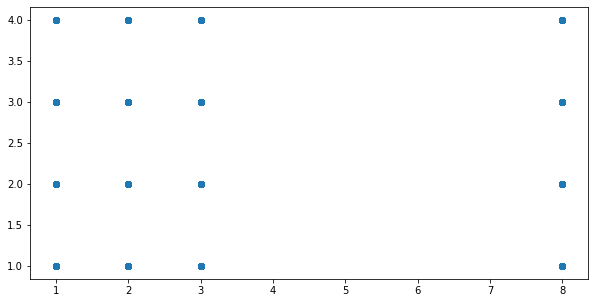

In [69]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(df['A'],df['C'])

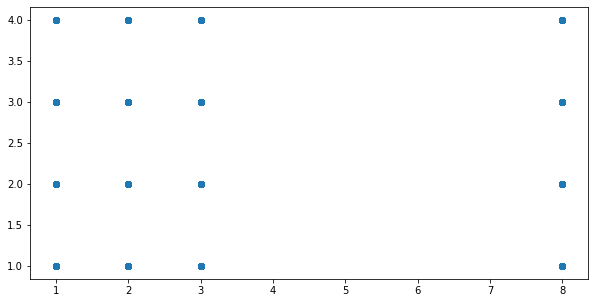

In [76]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(df['A'],df['B'])

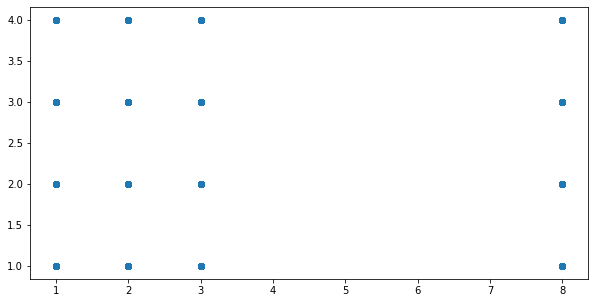

In [77]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(df['A'],df['D'])

**Scatter plots were generated for A vs the rest of the columns as only column A contains outliers.**

##### Q4) Based on z-score calculation, remove the ouliters from the data.[2]

In [54]:
from scipy import stats
z = np.abs(stats.zscore(df))

In [55]:
z

array([[1.7558971 , 0.4832337 , 0.42734674, 1.31673123],
       [0.15517941, 0.40343364, 1.31765245, 0.43420359],
       [0.15517941, 1.29010098, 0.46295897, 0.43420359],
       ...,
       [0.53739472, 0.4832337 , 0.46295897, 0.43420359],
       [1.7558971 , 1.36990104, 1.31765245, 0.43420359],
       [0.91961002, 1.29010098, 0.42734674, 0.44832404]])

In [56]:
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

##### Q5) Based on IQR-score calculation,remove the ouliters from the data.[2]

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

A    1.0
B    2.0
C    2.0
D    3.0
dtype: float64


In [72]:
(df<(Q1-(1.5*IQR)))|(df>(Q3+(1.5*IQR)))

,A,B,C,D
0,True,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,True,False,False,False


In [73]:
zout = df[(z<3).all(axis=1)]
zout.shape

(1000, 4)

In [74]:
iqrout = df[~((df<(Q1-(1.5*IQR)))|(df>(Q3+(1.5*IQR)))).any(1)]
iqrout.shape

(769, 4)

##### Q6) Use the dataset https://parvathy47.github.io/Parvathy47.github.io/Pak_Suicide_Bombings.csv again and perform the following operations:

In [9]:
pak = pd.read_csv("https://parvathy47.github.io/Parvathy47.github.io/Pak_Suicide_Bombings.csv")

In [10]:
pak.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \r\n2.Civil Hospital 3. Boland Me...,33.120,91.616


**a) How many unique province values are present in the dataset (as part of first look at data)?[2]**

In [11]:
cities = pak['City'].unique()
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [12]:
len(cities)

93

**b) Resolve the inconsistencies arising due to presence of whitespaces and difference in cases and then display the number of unique city values now.[2]**

In [13]:
#convert to lower case
pak['City'] = pak['City'].str.lower()

#remove trailing and leading whitespaces
pak['City'] = pak['City'].str.strip()

In [14]:
cities=pak['City'].unique()
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

**c) Display the names of those cities that are closest to 'D.I. Khan'.[2]**

In [15]:
import fuzzywuzzy
from fuzzywuzzy import process

C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [16]:
matches = fuzzywuzzy.process.extract('D.I. Khan',cities,limit=8)
matches

[('d. i khan', 95),
 ('d.i khan', 95),
 ('d.g khan', 84),
 ('hangu', 68),
 ('ghallanai, mohmand agency', 60),
 ('kohat', 60),
 ('chaman', 54),
 ('tank', 51)]

In [17]:
len(matches)

8

**d) Using the function created in class handle all the province name related inconsistencies.[2]**

In [18]:
#function to replace row values based on match score
def replace_matches(df,column,target,thresh=90):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(target,strings)
    close_matches = [match[0] for match in matches if match[1]>= thresh]
    matching_rows = df[column].isin(close_matches)
    df.loc[matching_rows,column] = target
    print('All done!!!')

In [19]:
replace_matches(df=pak,column='City',target='kuram agency')

All done!!!


In [20]:
cities = pak['City'].unique()
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'lahore', 'lakki marwat',
       'lasbela', 'lower dir', 'malakand', 'mansehra', 'mardan',
       'mohmand agency', 'mosal kor, mohmand agency', 'multan',
       'muzaffarabad', 'north waziristan', 'nowshehra', 'orakzai agency',
       'peshawar', 'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

In [21]:
replace_matches(df=pak,column='City',target='mohmand agency')

All done!!!


In [22]:
cities = pak['City'].unique()
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'gujrat', 'hangu', 'haripur',
       'hayatabad', 'islamabad', 'jacobabad', 'karachi', 'karak',
       'khanewal', 'khuzdar', 'khyber agency', 'kohat', 'kuram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

In [23]:
replace_matches(df=pak,column='City',target='charsadda')

All done!!!


In [24]:
cities = pak['City'].unique()
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'gujrat', 'hangu', 'haripur',
       'hayatabad', 'islamabad', 'jacobabad', 'karachi', 'karak',
       'khanewal', 'khuzdar', 'khyber agency', 'kohat', 'kuram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shangla', 'shikarpur', 'sialkot',
       'south waziristan', 'sudhanoti', 'sukkur', 'swabi', 'swat',
       'taftan', 'tank', 'taunsa', 'tirah valley', 'totalai', 'upper dir',
       'wagah', 'zhob'], dtype=object)